# Neopythen: potential map bases on Ellenberg(1)  




(1) https://www.researchgate.net/publication/235710596_Zeigwerte_von_Pflanzen_in_MittelEuropa

Check ellenberg numbers:

In [1]:
# READ ELLENBERG LEGEND
import pandas as pd
ellenberg_csv = r'N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\neophytes_ellenberg.csv'
df = pd.read_csv(ellenberg_csv,encoding="ISO-8859-1")
#print(df.to_string()) 



Constrution of datacube with 10m raster files which can be used to calculate the Ellenbergnumbers:




## (1) Reading dims

In [2]:
# Reading libaries:

import os
from pathlib import Path, WindowsPath
from glob import glob
from pathlib import Path
import geopandas as gpd

from pathlib import Path
import geopandas as gpd
import sys
import matplotlib.pyplot as plt

import rasterio
import rasterio.mask
import numpy as np
import subprocess
import pandas as pd
import xarray as xr
import rioxarray as rxr


print("job done")

job done


## (2) Building cube

In [31]:
## reading raster from CWS:

##  base folder on CWS:
base_path = WindowsPath('N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f02_raster_10m_collection/ellenberg')

# 1	Lichtzahl (L-Zahl)
# 2	Feuchtezahl (F-Zahl)
# 3	Temperaturzahl (T-Zahl)
# 4	Kontinentalitätszahl (K-Zahl)
# 5	Reaktionszahl (R-Zahl)
# 6	Stickstoffzahl (N-Zahl)
# 7	Salzzahl (S-Zahl)
# 8	Schwermetallresistenz
# 9	Lebensform
# 10 Blattausdauer

## AOI
#--------------------------
#min_x = 3316000 
#max_x = 3345000

#max_y = 1780000
#min_y = 1799000 
#--------------------------

## Datasets 01 Lichtzahl:-------------------------------------------
d01_L_parameter = os.path.join(base_path, 'shadow_2019_10m_b1.tif')
print(d01_L_parameter)
# Open the file:
cube_01_L = rxr.open_rasterio(d01_L_parameter)
cube_01 = cube_01_L.to_dataset(name='d01_L_light')

### Dataset 02 Feuchtezahl :-------------------------------------------
d02_F_parameter = os.path.join(base_path, 'twi_2019_10m_b1.tif')
print(d02_F_parameter)
# Open the file:
cube_02_F = rxr.open_rasterio(d02_F_parameter)
cube_02_F = cube_02_F.to_dataset(name='d02_F_wetness')

### Dataset 03 Temperatur:-------------------------------------------
d03_T_parameter = os.path.join(base_path, 'air_temperature_2017_month_mean_10m_b12.tif')
print(d03_T_parameter)
# Open the file:
cube_03_T = rxr.open_rasterio(d03_T_parameter)
cube_03_T = cube_03_T.to_dataset(name='d03_T_temperatur')

### Dataset 04 Kontinentaliätzahl:-------------------------------------------
d04_K_parameter = os.path.join(base_path, 'air_temperature_2017_month_mean_10m_b12.tif')
print(d04_K_parameter)
# Open the file:
cube_04_K = rxr.open_rasterio(d04_K_parameter)
cube_04_K = cube_04_K.to_dataset(name='d04_K_continentality')

### Dataset 05 Reaktionszahl (ph):-------------------------------------------
d05_R_parameter = os.path.join(base_path, 'pH_CaCl_10m_b1.tif')
print(d05_R_parameter)
# Open the file:
cube_05_R = rxr.open_rasterio(d05_R_parameter)
cube_05_R = cube_05_R.to_dataset(name='d05_R_ph')

## ### Dataset 06 Stickstoff:-------------------------------------------
d06_N_parameter = os.path.join(base_path, 'soil_nitrat_10m_b1.tif')
print(d06_N_parameter)
## # Open the file:
cube_06_N = rxr.open_rasterio(d06_N_parameter)
cube_06_N = cube_06_N.to_dataset(name='d06_N_nitrogen')## 

## ### Dataset 07 Salz:------------------------------------------- NO DATA ()
## d07_S_parameter = os.path.join(base_path, 'xxx.tif')
## print(d07_S_parameter)
## # Open the file:
## cube_07_S = rxr.open_rasterio(d07_S_parameter)
## cube_07_S = cube_07_S.to_dataset(name='d07_S_salt')## 

## ### Dataset 08 Schwermetall:-------------------------------------------  NO DATA ()
## d08_HM_parameter = os.path.join(base_path, 'xxx.tif')
## print(d08_HM_parameter)
## # Open the file:
## cube_08_HM = rxr.open_rasterio(d08_HM_parameter)
## cube_08_HM = cube_08_HM.to_dataset(name='d08_HM_heavy_metal')

### Dataset 09 Lebensform:-------------------------------------------
d09_watersurface_raster = os.path.join(base_path, 'land_cover_2021_10m_b1.tif')
cube_09__temp_LF = rxr.open_rasterio(d09_watersurface_raster)
#print(cube_09__temp_LF)
cube_09__temp_LF = cube_09__temp_LF.to_dataset(name='d09_LV_landcover')

# -- landcover_code	landcover_name
# -- 10	buildings
# -- 20	other constructed areas
# -- 30	bare soil
# -- 60	water
# -- 70	trees
# -- 71	dead trees
# -- 80	bushes
# -- 91	permanent herbaceous vegetation
# -- 92	seasonal herbaceous vegetation
# -- 93	vineyards


ds = cube_09__temp_LF
d09_LF_parameter_temp_water_area =    xr.where(ds['d09_LV_landcover'] == 60, 1, 0) # Else set to 0
# Adding the result back to the dataset (optional)
cube_09__temp_LF['ellenberg_water_area'] = d09_LF_parameter_temp_water_area

cube_09_LF_x = cube_09__temp_LF['ellenberg_water_area'] 
cube_09_1_LF_water = cube_09_LF_x.to_dataset(name='ellenberg_water_area')
#cube_09_LF_water

d09_LF_parameter_temp_not_sealed =    xr.where(ds['d09_LV_landcover'].isin ([30,70,71,80,91,92,93]), 1, 0) # Else set to 0
# Adding the result back to the dataset (optional)
cube_09__temp_LF['ellenberg_not_sealed_area'] = d09_LF_parameter_temp_not_sealed
cube_09_LF_x_non_sealed = cube_09__temp_LF['ellenberg_not_sealed_area'] 
cube_09_2_LF_non_sealed = cube_09_LF_x_non_sealed.to_dataset(name='ellenberg_not_sealed_area')
#cube_09_LF_non_sealed



print ("job done-------------------------------")



N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\shadow_2019_10m_b1.tif
N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\twi_2019_10m_b1.tif
N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\air_temperature_2017_month_mean_10m_b12.tif
N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\air_temperature_2017_month_mean_10m_b12.tif
N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\pH_CaCl_10m_b1.tif
N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\soil_nitrat_10m_b1.tif
job done-------------------------------


Translation raster values into "Ellenberg categories":

In [32]:
# QC QC
# Convert the data variable to a pandas Series
qc_water_arrea = cube_09_LF_water['ellenberg_water_area'].to_series()

# Get the count of each unique value
value_counts = qc_water_arrea.value_counts()

print(value_counts)

0    1010685
1       4083
Name: ellenberg_water_area, dtype: int64


### (2.1) Translation raster values into "Ellenberg categories":
1	Lichtzahl (L-Zahl)
2	Feuchtezahl (F-Zahl)
3	Temperaturzahl (T-Zahl)
4	Kontinentalitätszahl (K-Zahl)
5	Reaktionszahl (R-Zahl)
6	Stickstoffzahl (N-Zahl)
7	Salzzahl (S-Zahl)
8	Schwermetallresistenz
9	Lebensform
10	Blattausdauer


#### (2.1.1) Lichtzahl (L-Zahl)

ziffer	code_ziff	ziffer_info
1	    L-1	    Tiefschattenpflanze, noch bei weniger als 1 %, selten bei mehr als 30 % r. B. vorkommend
2	    L-2	    zwischen 1 und 3 stehend
3	    L-3	    Schattenpflanze, meist bei weniger als 5 % r. B., doch auch an helleren Stellen
4	    L-4	    zwischen 3 und 5 stehend
5	    L-5	    Halbschattenpflanze, nur ausnahmsweise im vollen Licht, meist aber bei mehr als 10 % r. B.
6	    L-6	    zwischen 5 und 7 stehend; selten bei weniger als 20 % r. B.
7	    L-7	    Halblichtpflanze, meist bei vollem Licht, aber auch im Schatten bis etwa 30 % r. B.
8	    L-8	    Lichtpflanze, nur ausnahmsweise bei weniger als 40 % r. B.
9	    L-9	    Volllichtpflanze, nur an voll bestrahlten Plätzen, nicht bei weniger als 50 % r. B.


In [33]:
## Updaten Ellenberg values

# get statistics from raster band:

ds = cube_01
light_number = ds.d01_light_number.sel(band=1)

# Compute statistics
max_value = light_number.max().item()    # Maximum
min_value = light_number.min().item()    # Minimum
mean_value = light_number.mean().item()  # Mean
std_value = light_number.std().item()    # Standard deviation

# Compute quantiles
quantiles = light_number.quantile([0.25, 0.5, 0.75], dim=None)  # 25th, 50th (median), 75th percentiles

# Convert xarray.DataArray to simple Python scalars
quantile_25 = quantiles.sel(quantile=0.25).item()
quantile_50 = quantiles.sel(quantile=0.5).item()  # Median
quantile_75 = quantiles.sel(quantile=0.75).item()

# Print statistics
print(f"Max value: {max_value}")
print(f"Min value: {min_value}")
print(f"Mean value: {mean_value}")
print(f"Standard deviation: {std_value}")

# Print quantile values
print(f"25th percentile (Q1): {quantile_25}")
print(f"50th percentile (Median): {quantile_50}")
print(f"75th percentile (Q3): {quantile_75}")

#######################################

# Applying the if-then query  0=light 1= dark raster pixel values
# Manualy classification of shadow values into ellenberg light-classes:
ds = cube_01
new_data =          xr.where(ds['d01_light_number'] > 0.9, 1,  #
                    xr.where(ds['d01_light_number'] > 0.8, 1,  #
                    xr.where(ds['d01_light_number'] > 0.7, 2,  #
                    xr.where(ds['d01_light_number'] > 0.6, 3,  #
                    xr.where(ds['d01_light_number'] > 0.5, 4,  #
                    xr.where(ds['d01_light_number'] > 0.4, 5,  #
                    xr.where(ds['d01_light_number'] > 0.3, 6,  #       
                    xr.where(ds['d01_light_number'] > 0.2, 7,  #
                    xr.where(ds['d01_light_number'] > 0.1, 9,  #
                    xr.where(ds['d01_light_number']  > 0, 9,  #
                             0)))))))))) # Else set to 0


# Adding the result back to the dataset (optional)
cube_01['ellenberg_light_number'] = new_data
print (cube_01)


AttributeError: 'Dataset' object has no attribute 'd01_light_number'

#### (2.1.2) Feuchtezahl (F-Zahl)

ziffer	code_ziff	ziffer_info
1	 F-1	        Starktrockniszeiger, an oftmals austrocknenden Stellen lebensfähig und auf trockene Böden beschränkt
2	 F-2	        zwischen 1 und 3 stehend
3	 F-3	        auf feuchten Böden fehlend
4	 F-4	        zwischen 3 und 5 stehend
5	 F-5	        Frischezeiger, Schwerpunkt auf mittelfeuchten Böden, auf nassen sowie auf öfter austrocknenden Böden fehlend
6	 F-6	        zwischen 5 und 7 stehend
7	 F-7	        Feuchtezeiger, Schwerpunkt auf gut durchfeuchteten, aber nicht nassen Böden
8	 F-8	        zwischen 7 und 9 stehend
9	 F-9	        Nässezeiger, Schwerpunkt auf oft durchnässten (luftarmen) Böden
10	 F-10	        Wasserpflanze, die längere Zeiten auch ohne Wasserbedeckung des Bodens überlebt
11	 F-11	        Wasserpflanze, die unter Wasser wurzelt, aber zumindest zeitweilig mit Blättern über dessen Oberfläche aufragt, ..
12	 F-12	        Unterwasserpflanze, ständig oder fast dauernd untergetaucht


In [39]:
## Updaten Ellenberg values   # 1 = wet rasster values 0 = dry
import numpy as np
# get statistics from raster band:

ds = cube_04
light_number = ds.d04_wetness_number.sel(band=1)


# Compute statistics
max_value = light_number.max().item()    # Maximum
min_value = light_number.min().item()    # Minimum
mean_value = light_number.mean().item()  # Mean
std_value = light_number.std().item()    # Standard deviation

# Compute quantiles
quantiles = light_number.quantile([0.25, 0.5, 0.75], dim=None)  # 25th, 50th (median), 75th percentiles

# Convert xarray.DataArray to simple Python scalars
quantile_25 = quantiles.sel(quantile=0.25).item()
quantile_50 = quantiles.sel(quantile=0.5).item()  # Median
quantile_75 = quantiles.sel(quantile=0.75).item()

# Print statistics
print(f"Max value: {max_value}")
print(f"Min value: {min_value}")
print(f"Mean value: {mean_value}")
print(f"Standard deviation: {std_value}")

# Print quantile values
print(f"25th percentile (Q1): {quantile_25}")
print(f"50th percentile (Median): {quantile_50}")
print(f"75th percentile (Q3): {quantile_75}")




## the data should be scaled from 0-1: 

# option A (linear)
# Calculate the minimum and maximum values of the data
min_value = light_number.min().values
max_value = light_number.max().values
# Perform the linear stretch (normalization)
light_number_linear = (light_number - min_value) / (max_value - min_value)

# option B (by percnetile)
# Define lower and upper percentiles (e.g., 2nd and 98th percentiles)
#p_low, p_high = 2, 98
#
## Compute the values at the specified percentiles
#
## Assuming light_number is a NumPy array or xarray DataArray
#light_number = ds.d04_wetness_number.sel(band=1).values  # Extract as a NumPy array
#
## Define the number of parts (in this case, 10)
#num_parts = 10
#
## Compute the bin edges for dividing the data into 10 equal parts (deciles)
#bin_edges = np.percentile(light_number, np.linspace(0, 100, num_parts + 1))
#
## Use np.digitize to assign each value to a bin (1 to 10)
#light_number_binned = np.digitize(light_number, bins=bin_edges, right=True)



light_number = light_number_linear

print ("new statistics:")
# Compute statistics
max_value = light_number.max().item()    # Maximum
min_value = light_number.min().item()    # Minimum
mean_value = light_number.mean().item()  # Mean
std_value = light_number.std().item()    # Standard deviation
# Print statistics
print(f"Max value: {max_value}")
print(f"Min value: {min_value}")
print(f"Mean value: {mean_value}")
print(f"Standard deviation: {std_value}")

#######################################


# Manualy classification of shadow values into ellenberg light-classes:
ds = cube_04
new_data =          xr.where(ds['d04_wetness_number'] > 0.9, 1,  #
                    xr.where(ds['d04_wetness_number'] > 0.8, 1,  #
                    xr.where(ds['d04_wetness_number'] > 0.7, 2,  #
                    xr.where(ds['d04_wetness_number'] > 0.6, 3,  #
                    xr.where(ds['d04_wetness_number'] > 0.5, 4,  #
                    xr.where(ds['d04_wetness_number'] > 0.4, 5,  #
                    xr.where(ds['d04_wetness_number'] > 0.3, 6,  #       
                    xr.where(ds['d04_wetness_number'] > 0.2, 7,  #
                    xr.where(ds['d04_wetness_number'] > 0.1, 9,  #
                    xr.where(ds['d04_wetness_number']  > 0, 9,  #
                             0)))))))))) # Else set to 0


# Adding the result back to the dataset (optional)
cube_04['ellenberg_wetnes_number'] = new_data
print (cube_04)


Max value: 0.5655166506767273
Min value: 0.10185924917459488
Mean value: 0.21759621798992157
Standard deviation: 0.05478206276893616
25th percentile (Q1): 0.19416487589478493
50th percentile (Median): 0.20510729402303696
75th percentile (Q3): 0.21778062358498573
new statistics:
Max value: 1.0
Min value: 0.0
Mean value: 0.24961739778518677
Standard deviation: 0.11816254258155823
<xarray.Dataset>
Dimensions:                  (band: 1, x: 972, y: 1044)
Coordinates:
  * band                     (band) int32 1
  * x                        (x) float64 7.286e+04 7.286e+04 ... 8.256e+04
  * y                        (y) float64 8.002e+04 8.002e+04 ... 6.96e+04
    spatial_ref              int32 0
Data variables:
    d04_wetness_number       (band, y, x) float32 0.166 0.1711 ... 0.2072 0.1981
    ellenberg_wetnes_number  (band, y, x) int32 9 9 9 9 9 9 9 ... 7 7 7 7 9 7 9


#### (2.1.3) Temperaturzahl (T-Zahl)


In [ ]:
import numpy as np
# get statistics from raster band:

ds = cube_04
light_number = ds.d04_wetness_number.sel(band=1)


# Compute statistics
max_value = light_number.max().item()    # Maximum
min_value = light_number.min().item()    # Minimum
mean_value = light_number.mean().item()  # Mean
std_value = light_number.std().item()    # Standard deviation

# Compute quantiles
quantiles = light_number.quantile([0.25, 0.5, 0.75], dim=None)  # 25th, 50th (median), 75th percentiles

# Convert xarray.DataArray to simple Python scalars
quantile_25 = quantiles.sel(quantile=0.25).item()
quantile_50 = quantiles.sel(quantile=0.5).item()  # Median
quantile_75 = quantiles.sel(quantile=0.75).item()

# Print statistics
print(f"Max value: {max_value}")
print(f"Min value: {min_value}")
print(f"Mean value: {mean_value}")
print(f"Standard deviation: {std_value}")

# Print quantile values
print(f"25th percentile (Q1): {quantile_25}")
print(f"50th percentile (Median): {quantile_50}")
print(f"75th percentile (Q3): {quantile_75}")


#### (2.1.4) Kontinentalitätszahl (K-Zahl)

#### (2.1.5) Reaktionszahl (R-Zahl)

#### (2.1.6) Stickstoffzahl (N-Zahl)


#### (2.1.7) Salzzahl (S-Zahl)

#### (2.1.8) Schwermetallresistenz

#### (2.1.9) Lebensform

#### (2.1.10) Blattausdauer

### (2.2) Testing cubes

#### (2.2.1) Merging the single parameter-cubes

In [ ]:
## Merge datasets:
combined_array = xr.merge([cube_01, cube_02,cube_03, cube_04,cube_05 ,cube_06 ])

In [ ]:
SELECT 

In [9]:
#combined_array = cube_01

combined_array.d01_light_number.sel(band=1).plot()
#combined_array.d07_population_2021_1km.sel(band=1).plot()


##a ad info




NameError: name 'combined_array' is not defined

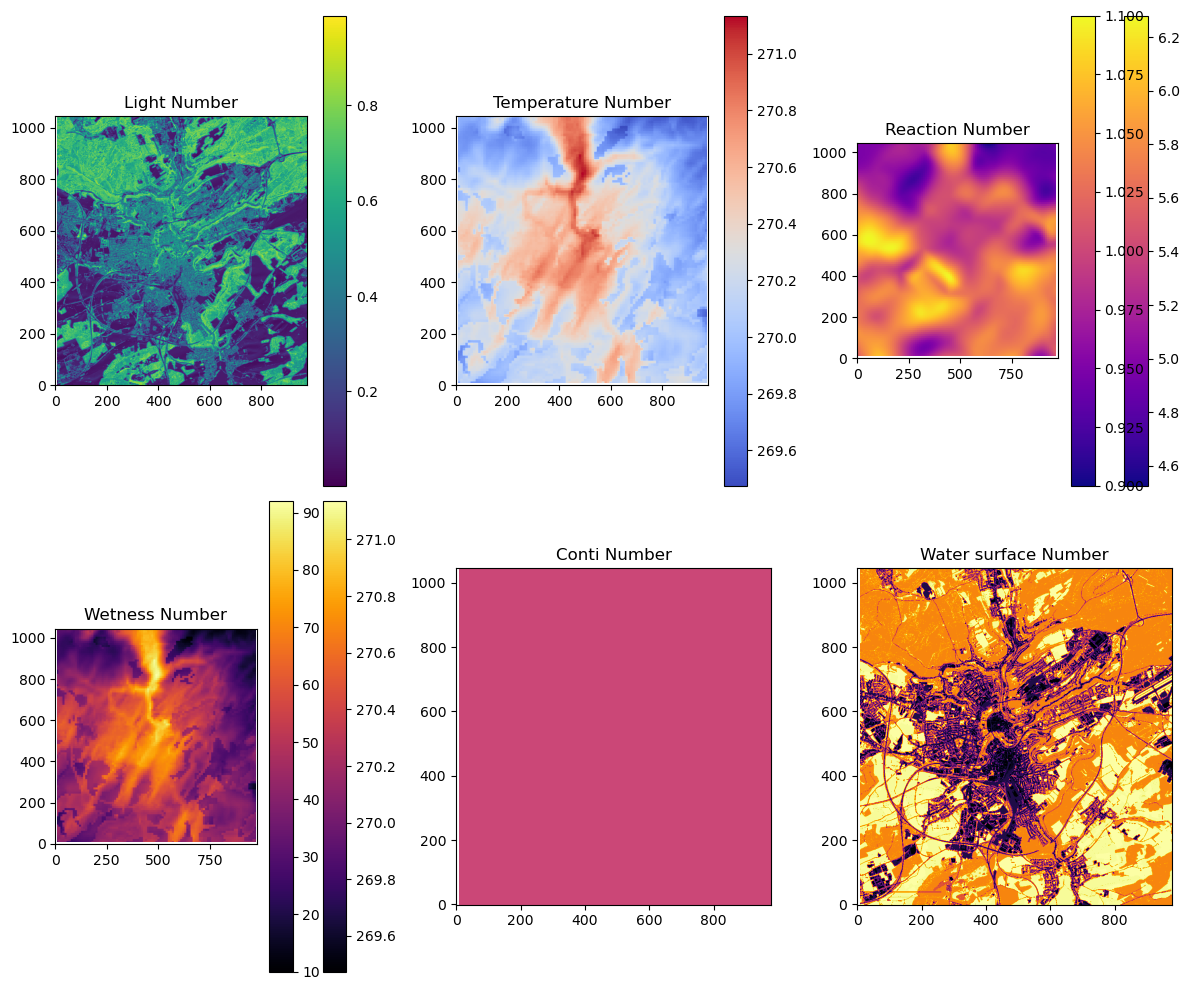

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming p1, p2, p3, and p4 are 2D numpy arrays
p1 = combined_array.d01_light_number.sel(band=1).astype(np.float32)
p2 = combined_array.d02_temperatur_number.sel(band=1).astype(np.float32)
p3 = combined_array.d03_reaction_number.sel(band=1).astype(np.float32)
p4 = combined_array.d04_wetness_number.sel(band=1).astype(np.float32)
p5 = combined_array.d05_conti_number.sel(band=1).astype(np.float32)
p6 = combined_array.d06_watersurface.sel(band=1).astype(np.float32)


# Create a figure with four subplots in a 2x2 grid
fig, axes = plt.subplots(2, 3, figsize=(12, 10))

# Flatten the axes array to easily access individual subplots
axes = axes.flatten()

# Plot p1
im1 = axes[0].imshow(p1, cmap='viridis', origin='lower')
axes[0].set_title('Light Number')
plt.colorbar(im1, ax=axes[0], orientation='vertical')

# Plot p2
im2 = axes[1].imshow(p2, cmap='coolwarm', origin='lower')
axes[1].set_title('Temperature Number')
plt.colorbar(im2, ax=axes[1], orientation='vertical')

# Plot p3
im3 = axes[2].imshow(p3, cmap='plasma', origin='lower')
axes[2].set_title('Reaction Number')
plt.colorbar(im3, ax=axes[2], orientation='vertical')

# Plot p4
im4 = axes[3].imshow(p4, cmap='inferno', origin='lower')
axes[3].set_title('Wetness Number')
plt.colorbar(im4, ax=axes[3], orientation='vertical')

# Plot p5
im3 = axes[4].imshow(p5, cmap='plasma', origin='lower')
axes[4].set_title('Conti Number')
plt.colorbar(im3, ax=axes[2], orientation='vertical')

# Plot p6
im4 = axes[5].imshow(p6, cmap='inferno', origin='lower')
axes[5].set_title('Water surface Number')
plt.colorbar(im4, ax=axes[3], orientation='vertical')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#ddd
